# Gradient Descent Optimization

Gradient descent is a **first-order iterative optimization algorithm** for finding the ***minimum of a function***. 
To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. 
If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.

In this example, we want to minimize the function $y = (x-3)^2$ [let's call it **Loss Function**]. That is we want to find out the value of x for which value of y is minimum. We will do it by tensorflow gradient descent .

In [111]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

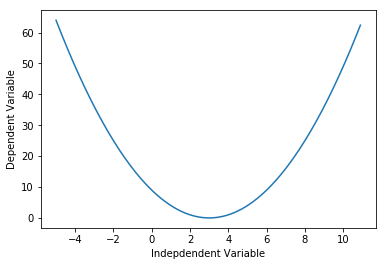

In [112]:
X = np.arange(-5.0, 11.0, 0.1)
Y = np.power(X-3,2)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [117]:
x = tf.Variable(10.0, name="x")
loss = tf.pow(x-3,2, name="loss")

In [122]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

In [123]:
a = np.zeros(21,)
b = np.zeros(21,)
a[0] = 10
b[0] = 49

In [124]:
with tf.Session() as sess:
    x.initializer.run()
    for i in range(20):
        print "x: ", x.eval()
        train_step.run()
        print "loss: ",loss.eval()
        a[i+1] =  x.eval()
        b[i+1] =  loss.eval()

x:  10.0
loss:  31.36
x:  8.6
loss:  20.0704
x:  7.48
loss:  12.8451
x:  6.584
loss:  8.22084
x:  5.8672
loss:  5.26134
x:  5.29376
loss:  3.36725
x:  4.83501
loss:  2.15504
x:  4.46801
loss:  1.37923
x:  4.17441
loss:  0.882706
x:  3.93952
loss:  0.564932
x:  3.75162
loss:  0.361556
x:  3.6013
loss:  0.231396
x:  3.48104
loss:  0.148093
x:  3.38483
loss:  0.0947798
x:  3.30786
loss:  0.0606591
x:  3.24629
loss:  0.0388218
x:  3.19703
loss:  0.0248459
x:  3.15763
loss:  0.0159014
x:  3.1261
loss:  0.0101769
x:  3.10088
loss:  0.00651321


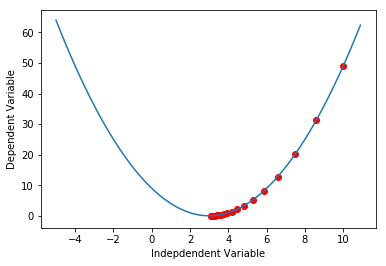

In [125]:
plt.plot(X,Y) 
plt.scatter(a,b, color='red')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Maximizing by gradient descent

### For this we only need to negate the desired function, Min of it will be the max of the original function.

Suppose we want to maximize $y = sin(x)$ i.e. we want to find the value of x for which value of y is maximum. It is same as finding minimum of $-y$ function.

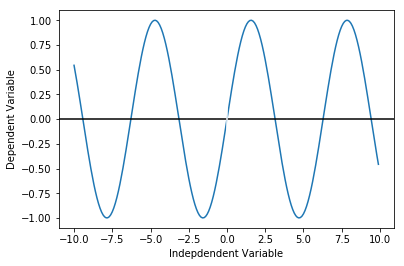

In [126]:
X = np.arange(-10.0, 10.0, 0.1)
Y = np.sin(X)
plt.plot(X,Y) 
plt.axhline(0, color='black')
plt.axvline(0, color='white')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [127]:
y = tf.Variable(-1.0)
max_goal = tf.sin(y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
train_max = optimizer.minimize(-1*max_goal)
init_op = tf.global_variables_initializer()
m = np.zeros(50)
n = np.zeros(50)

In [128]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(50):
        print "Y: ", y.eval()
        sess.run(train_max)
        print "Max val: ", max_goal.eval()
        m[i] =  y.eval()
        n[i] =  max_goal.eval()

Y:  -1.0
Max val:  -0.811065
Y:  -0.94597
Max val:  -0.775479
Y:  -0.887474
Max val:  -0.734098
Y:  -0.824337
Max val:  -0.686331
Y:  -0.756432
Max val:  -0.631668
Y:  -0.683703
Max val:  -0.569732
Y:  -0.60618
Max val:  -0.500344
Y:  -0.523997
Max val:  -0.423598
Y:  -0.437414
Max val:  -0.339917
Y:  -0.346829
Max val:  -0.2501
Y:  -0.252783
Max val:  -0.15533
Y:  -0.155961
Max val:  -0.0571439
Y:  -0.057175
Max val:  0.0426486
Y:  0.0426616
Max val:  0.142088
Y:  0.142571
Max val:  0.239214
Y:  0.241556
Max val:  0.332217
Y:  0.338653
Max val:  0.419571
Y:  0.432973
Max val:  0.500127
Y:  0.523745
Max val:  0.573147
Y:  0.61034
Max val:  0.638298
Y:  0.692286
Max val:  0.695607
Y:  0.769265
Max val:  0.745382
Y:  0.841107
Max val:  0.788134
Y:  0.907771
Max val:  0.824502
Y:  0.969321
Max val:  0.855185
Y:  1.02591
Max val:  0.88089
Y:  1.07774
Max val:  0.902298
Y:  1.12507
Max val:  0.92004
Y:  1.16818
Max val:  0.934683
Y:  1.20737
Max val:  0.946726
Y:  1.24291
Max val:  0.956605

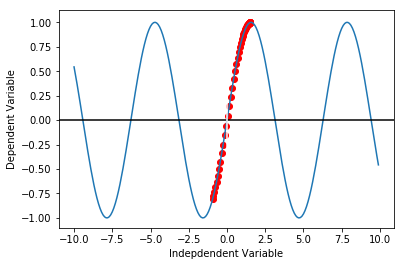

In [129]:
plt.plot(X,Y) 
plt.scatter(m,n, color='red')
plt.axhline(0, color='black')
plt.axvline(0, color='white')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Effect of Learning Rate

Now, we will see the ***effect of learning_rate*** in gradient descent algorithm. We will use the first problem of this notebook to illustrate this. That is: we want to minimize $y = (x-3)^2$. We will use a list of **learning_rate** $[.00001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]$.For each of the learning_rate we will plot the corresponding figure.

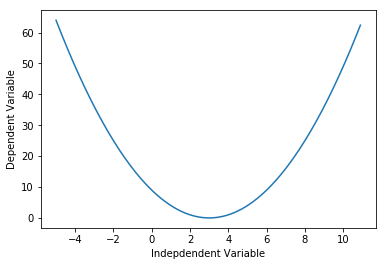

In [131]:
X = np.arange(-5.0, 11.0, 0.1)
Y = np.power(X-3,2)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [132]:
def train(eta):
    x = tf.Variable(10.0, name="x")
    goal = tf.pow(x-3,2, name="goal")

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=eta)
    train_step = optimizer.minimize(goal)

    a = np.zeros(21,)
    b = np.zeros(21,)
    a[0] = 10
    b[0] = 49


    with tf.Session() as sess:
        x.initializer.run()
        for i in range(20):
            #print "x: ", x.eval()
            train_step.run()
            #7print "loss: ",goal.eval()
            a[i+1] =  x.eval()
            b[i+1] =  goal.eval()

    txt = "For training_rate = {0}, we get Minimized_X = {1} and Loss = {2}".format(eta, a[20], b[20])
    plt.plot(X,Y) 
    plt.scatter(a,b, color='red')
    plt.ylabel('Dependent Variable, Y')
    plt.xlabel('Indepdendent Variable, X')
    plt.text(-20,-25,txt, verticalalignment='top', horizontalalignment='left',
        color='green', fontsize=15)
    plt.show()

We used 20 iterations for each of the training


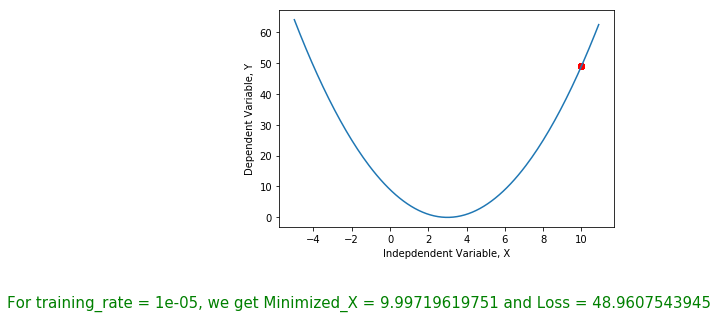

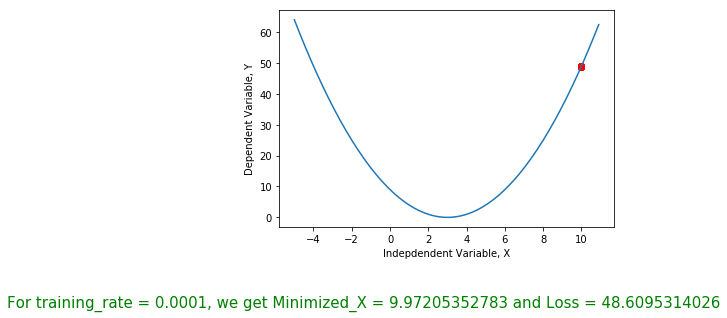

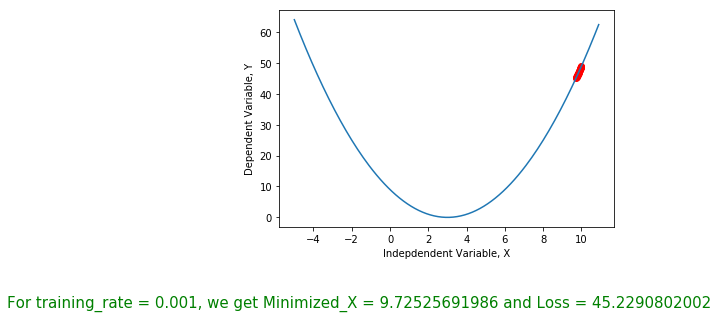

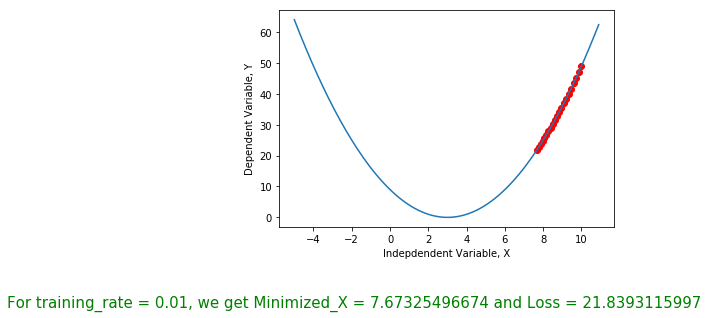

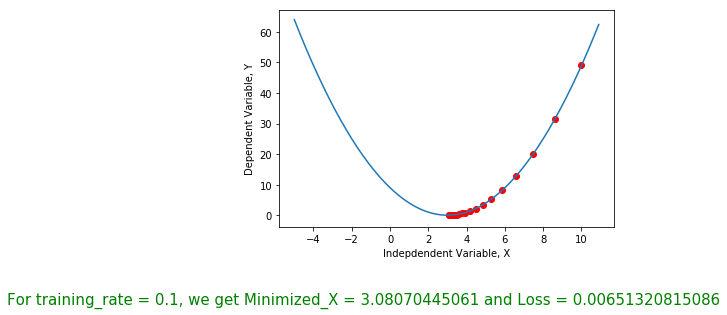

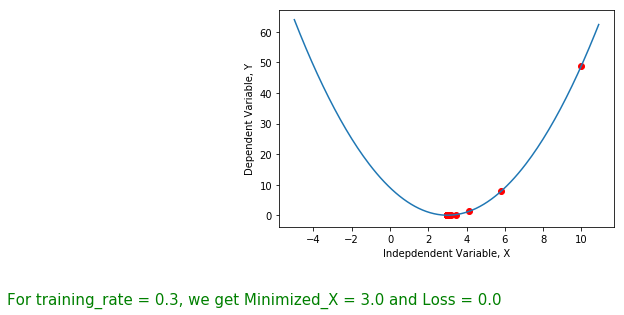

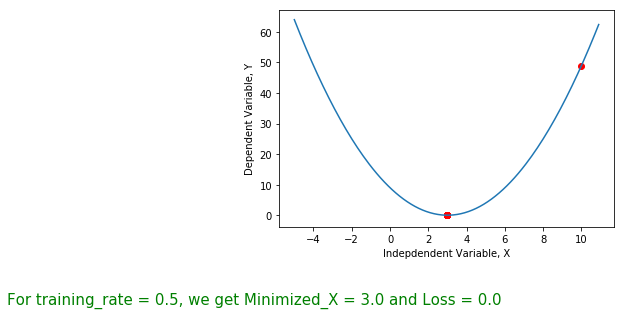

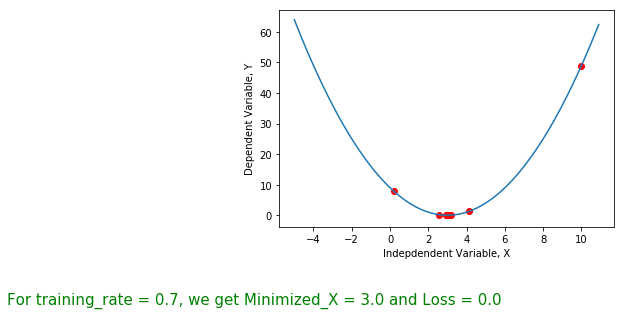

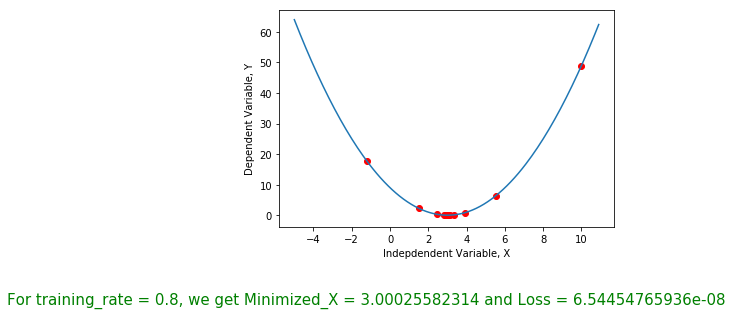

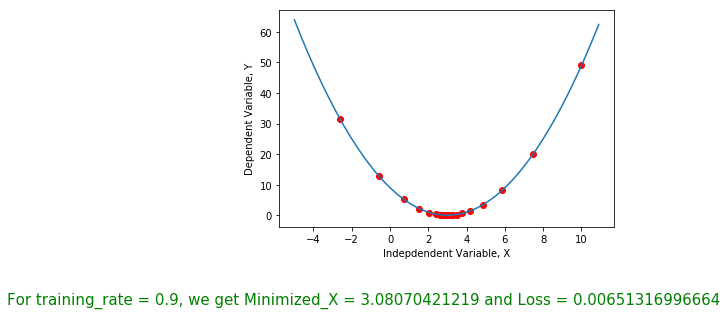

In [133]:
print "We used 20 iterations for each of the training"
tr_rate_list = [.00001, .0001, .001, .01, .1, .3, .5, .7, .8, .9]
for i in tr_rate_list:
    train(i)  

